In [11]:
import matplotlib.pyplot as plt

title = "Numbers"
row_length = 151
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 30
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [12]:
from IPython.display import Markdown
# Define a variable
# Display the variable's value in Markdown
contents = f"### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str
Markdown(contents)

row's len = 151


### Numbers
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1180|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
|1152|30,31,32,35,36,37|5|201|0|0|0|6|0|
|1151|02,03,09,15,27,29|8|85|3|1|2|0|0|

In [145]:
def draw_markdown(rows: list):
    from IPython.display import Markdown
    # Define a variable
    # Display the variable's value in Markdown
    table_header = "|title|content|"
    table_sep = "|--|--|"
    table_rows = [table_header,
                  table_sep,
                  ]
    for row in rows:
        table_rows.append(f"|{row[0]}|{row[1]}|")
    table_rows_str = "\n".join(table_rows)
    Markdown(table_rows_str)
    for row in rows:
        print(row)


def draw_graph(X, title):
    print(X)
    y = [i for i in range(len(X))]
    plt.figure(figsize=(12, 6))
    plt.plot(y, X, label='Nums')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    plt.legend()
    plt.show()


def draw_scatter(Y: list, title, show_line=True, show_dot=True, show_cols=[0], ext_datas=[], show_label=True, helper_line_nums=[], marker_size=3):
    import numpy as np
    plt.figure(figsize=(12, 6))
    colors=['b', 'g', 'r', 'c', 'm', 'y']
    if show_line == False and show_dot == False:
        show_line = True
    last = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}

    # draw helper line
    for helper_line_num in helper_line_nums:
        helper_line = [helper_line_num for i in range(len(Y[0]))]
        X = [i for i in range(len(Y[0]))]
        plt.plot(X, helper_line, color="tab:gray")

    for show_col in show_cols:
        if show_col < len(Y):
            if show_label:
                label = f'Nums{show_col}'            
            else:
                label = ""
            X = [i for i in range(len(Y[show_col]))]
            if show_line:
                plt.plot(X, Y[show_col], label=label, color=colors[show_col])
                label = ""
            if show_dot:
                plt.plot(X, Y[show_col], marker='o', markersize=marker_size, color = colors[show_col], label=label)
        last[show_col].append(Y[show_col][-1:][0])
    if len(ext_datas) > 0:
        for ext in ext_datas:
            if ext[0] < 6 and ext[0] in last:
                show_col = ext[0]
                last[show_col].append(ext[1])
                loc = np.arange(len(Y[0])-1, len(Y[0]) + len(last[show_col])-1)
                if show_line:
                    plt.plot(loc, last[show_col], color='k')
                if show_dot:
                    plt.plot(loc, last[show_col], marker='o', markersize=marker_size, color='k')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    if show_label:
        plt.legend()
    plt.show()


def get_pre_bef(nums, wanted_num):
    results = []
    for pos in range(len(nums)):
        parts = []
        if nums[pos] == wanted_num:
            if pos > 0 and pos < (len(nums) - 1 ):
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos == 0 and pos < (len(nums) - 1 ):
                parts.append(-1)
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos >= (len(nums) - 1 ) and pos > 0:
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(-1)
            results.append(parts)
    return results
            

def draw_average(my_list, length, selected, helper_line_nums=[10,20,30,40], show_diff=False):
    print(f'{"_"*40}')
    averages = []
    metrics = []
    show_cols = [0]
    for i in range(len(my_list) - length + 1):
        item_part = my_list[i: i+length]
        average = np.mean(item_part)
        averages.append(float(average))
    metrics.append(averages)
    ordered = averages.copy()
    ordered.sort()
    draw_markdown([('최소값',f'{ordered[0:5]}'),
                   ('마지막',f'{averages[-5:]}')
                  ])
    if show_diff:
        diff = [0] + [averages[i] - averages[i-1] for i in range(1, len(averages))]
        metrics.append(diff)
        show_cols.append(1)
    draw_scatter(metrics, f'average : {selected+1} {length}', True, True, show_cols=show_cols, helper_line_nums=helper_line_nums)


def get_information(selected, ext_data, wanted_data_length, helper_line_nums_1, helper_line_nums_2, show_diff=False):
    """ get_information """
    draw_scatter(row_list_none_last,
                 f'Line Num : {selected+1}',
                 True, True,
                 [selected],
                 [(selected,ext_data)],
                 helper_line_nums=helper_line_nums_1)
    import numpy as np
    length = 8
    my_list = row_list_none_last[selected] + [ext_data]
    last_num = row_list_none_last[selected][-1:][0]
    ordered = my_list.copy()
    ordered.sort()
    ordered_dict = {}
    for i in ordered:
        if i not in ordered_dict:
            ordered_dict[i] = 1
        else:
            ordered_dict[i] += 1
    ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
    ordered = list(set(ordered))
    pre_bef = get_pre_bef(row_list_none_last[0], last_num)
    draw_markdown([
        ('최소 값           ',f'{ordered[:wanted_data_length]}'),
        ('최대 값           ',f'{ordered[-wanted_data_length:]}'),
        ('사용자 선택       ',f'{ext_data}'),
        ('마지막 값         ',f'{last_num}'),
        ('마지막 값들       ',f'{row_list_none_last[selected][-wanted_data_length:]}'),
        ('자주 나오는 값    ',f'{ordered_dict_sorted[-wanted_data_length:]}'),
        ('마지막 수의 앞과 뒤',f'{pre_bef}')
    ]
    )
    draw_average(my_list, length=5, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)
    draw_average(my_list, length=8, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)
    draw_average(my_list, length=10, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)
    draw_average(my_list, length=13, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)
    draw_average(my_list, length=15, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)


In [146]:
nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

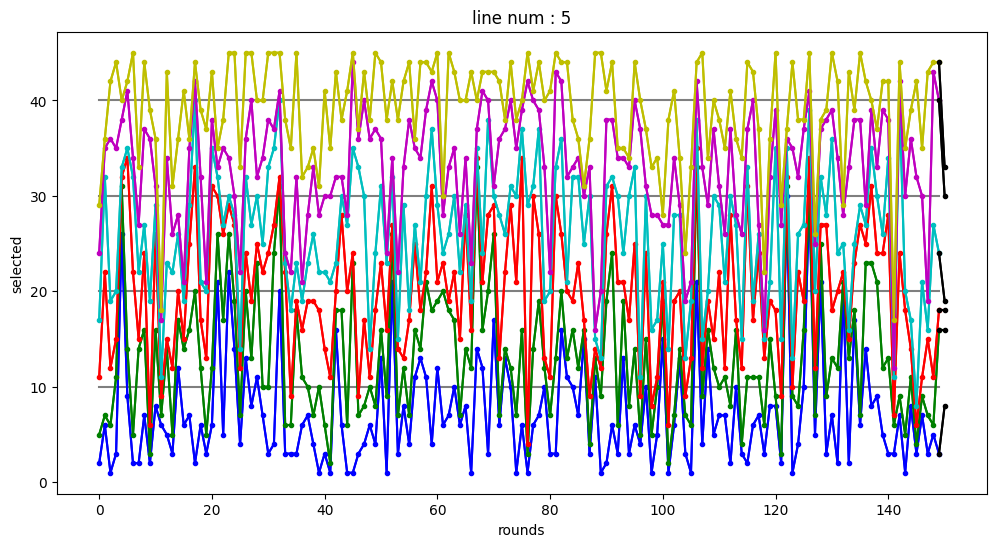

In [147]:
# for i in range(6):
#     draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])
# ext_datas =  [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6)]
# ext_datas =  [(0, 3), (1,7), (2,12), (3,26), (4,33), (5,40)]
ext_datas = []
for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False


draw_scatter(row_list, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40])


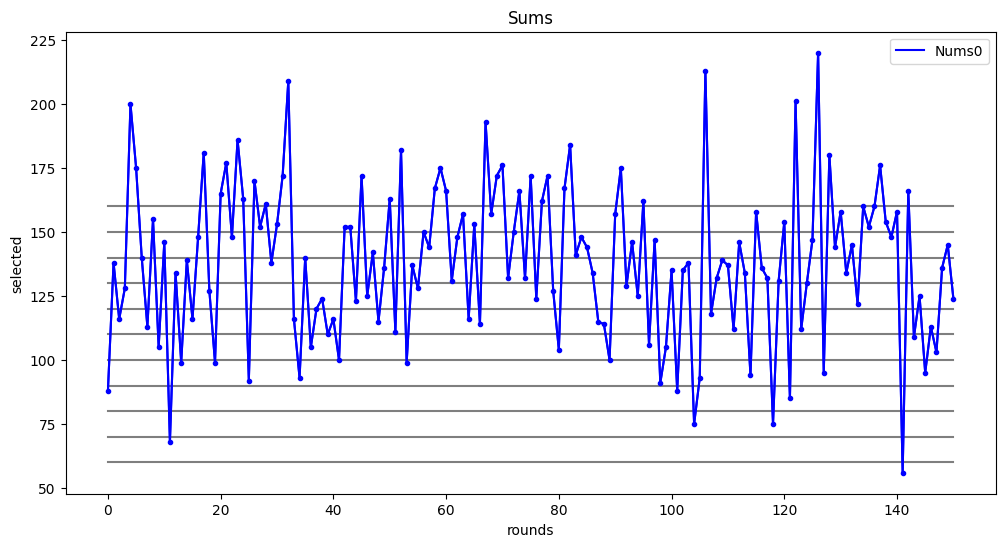

candidate =  124
candidate =  dict_values([8, 16, 18, 19, 30, 33])
last      =  [88, 138, 116, 128, 200, 175, 140, 113, 155, 105, 146, 68, 134, 99, 139, 116, 148, 181, 127, 99, 165, 177, 148, 186, 163, 92, 170, 152, 161, 138, 153, 172, 209, 116, 93, 140, 105, 120, 124, 110, 116, 100, 152, 152, 123, 172, 125, 142, 115, 136, 163, 111, 182, 99, 137, 128, 150, 144, 167, 175, 166, 131, 148, 157, 116, 153, 114, 193, 157, 172, 176, 132, 150, 166, 132, 172, 124, 162, 172, 127, 104, 167, 184, 141, 148, 144, 134, 115, 114, 100, 157, 175, 129, 146, 125, 162, 106, 147, 91, 105, 135, 88, 135, 138, 75, 93, 213, 118, 132, 139, 137, 112, 146, 134, 94, 158, 136, 132, 75, 131, 154, 85, 201, 112, 130, 147, 220, 95, 180, 144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 136, 145]


In [148]:
s1 = sums[:-1] + [sum(candidate.values())]
draw_scatter([s1], f'Sums', helper_line_nums=[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
print('candidate = ', sum(candidate.values()))
print('candidate = ', candidate.values())
print('last      = ', sums[:-1])

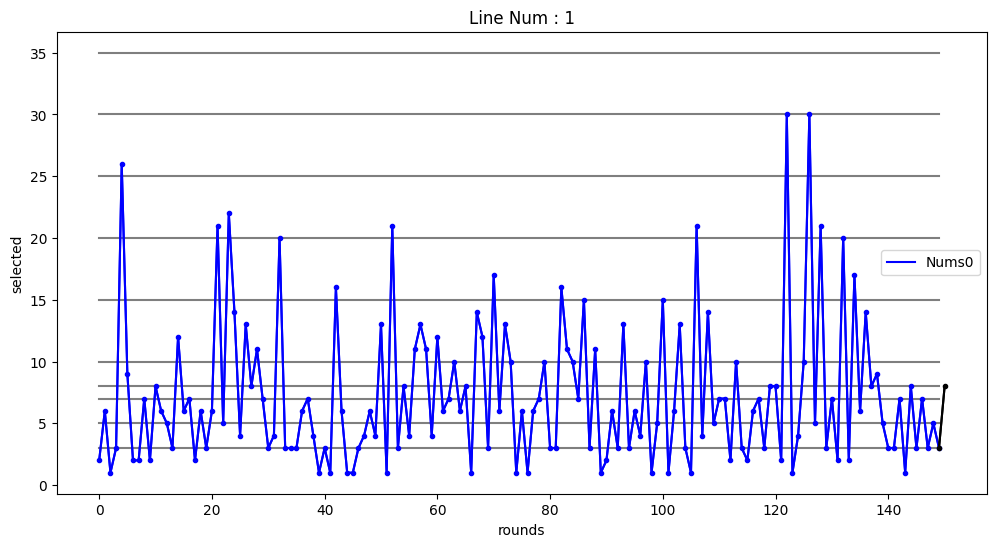

('최소 값           ', '[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22]')
('최대 값           ', '[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]')
('사용자 선택       ', '8')
('마지막 값         ', '3')
('마지막 값들       ', '[7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3]')
('자주 나오는 값    ', '[(9, 2), (15, 2), (16, 2), (17, 2), (20, 2), (30, 2), (12, 3), (14, 4), (21, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 9), (4, 10), (2, 11), (7, 13), (1, 15), (6, 18), (3, 25)]')
('마지막 수의 앞과 뒤', '[[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [21, 3, 7], [5, 3, 3], [3, 3, 7], [8, 3, 7], [7, 3, 5], [5, 3, -1]]')
________________________________________
('최소값', '[3.0, 3.0, 3.2, 3.6, 3.8]')
('마지막', '[5.2, 4.4, 5.2, 4.2, 5.2]')


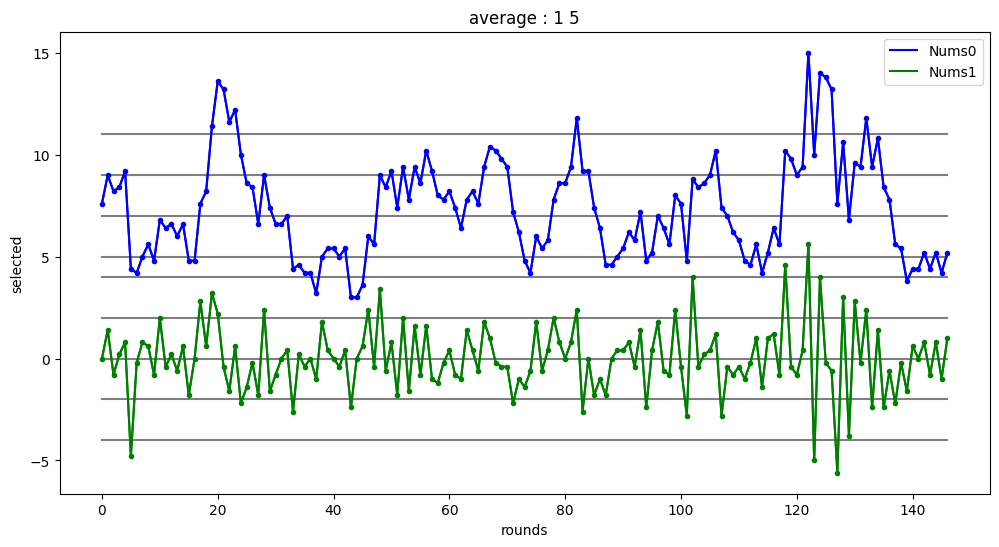

________________________________________
('최소값', '[3.5, 3.75, 4.0, 4.125, 4.125]')
('마지막', '[4.625, 4.375, 4.625, 4.625, 4.75]')


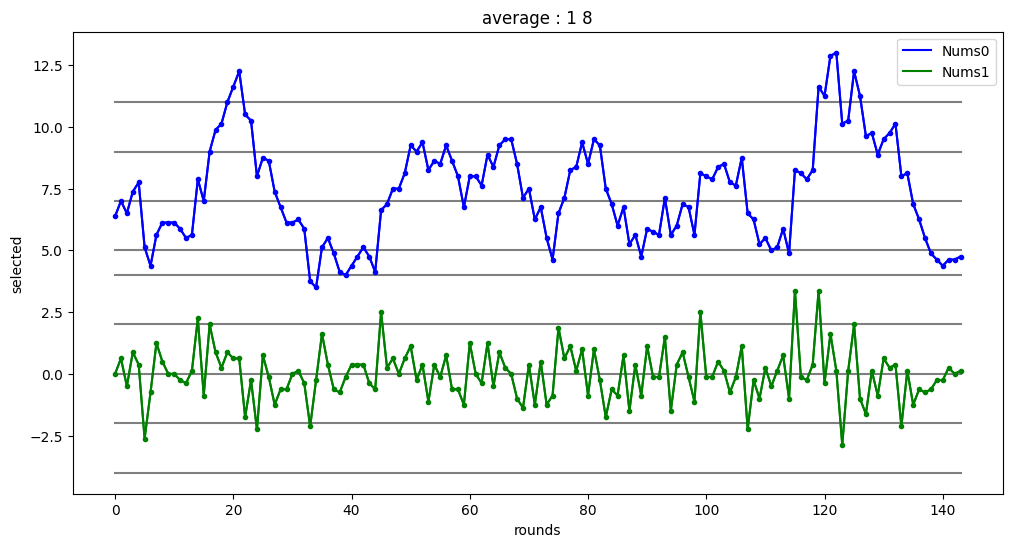

________________________________________
('최소값', '[4.0, 4.2, 4.3, 4.3, 4.5]')
('마지막', '[5.4, 4.9, 4.5, 4.3, 4.8]')


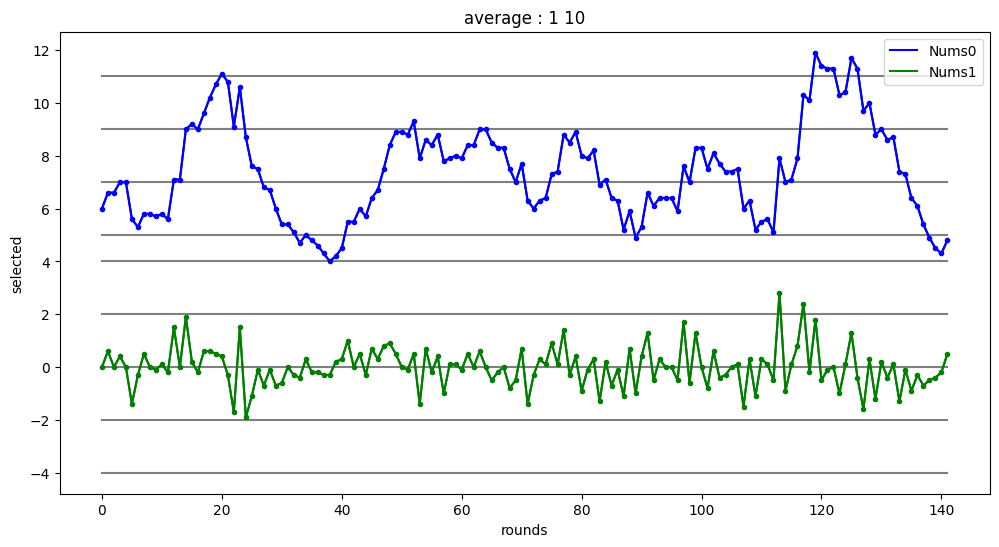

________________________________________
('최소값', '[4.230769230769231, 4.230769230769231, 4.3076923076923075, 4.384615384615385, 4.538461538461538]')
('마지막', '[7.0, 5.923076923076923, 5.846153846153846, 5.0, 5.0]')


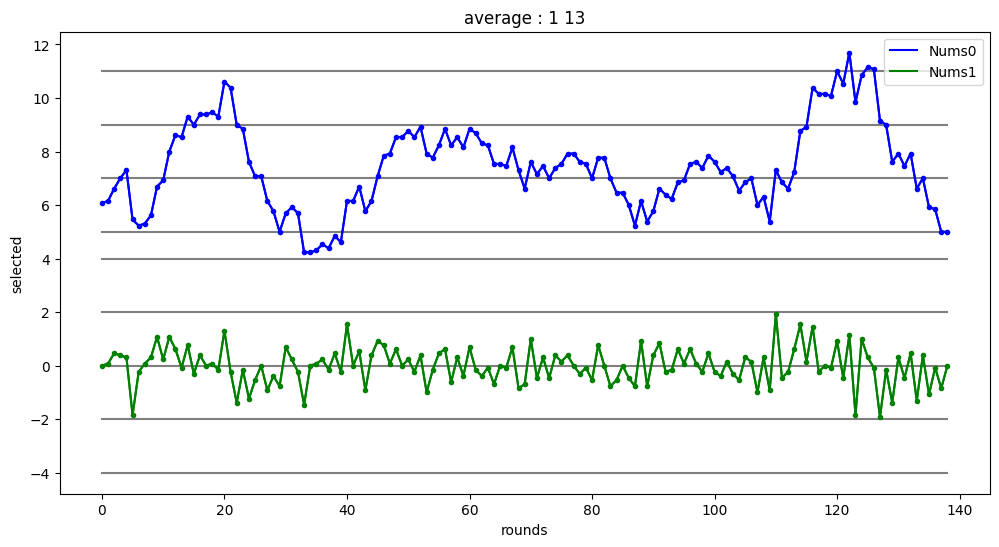

________________________________________
('최소값', '[4.133333333333334, 4.333333333333333, 4.4, 4.733333333333333, 5.066666666666666]')
('마지막', '[7.533333333333333, 6.4, 6.6, 5.666666666666667, 5.8]')


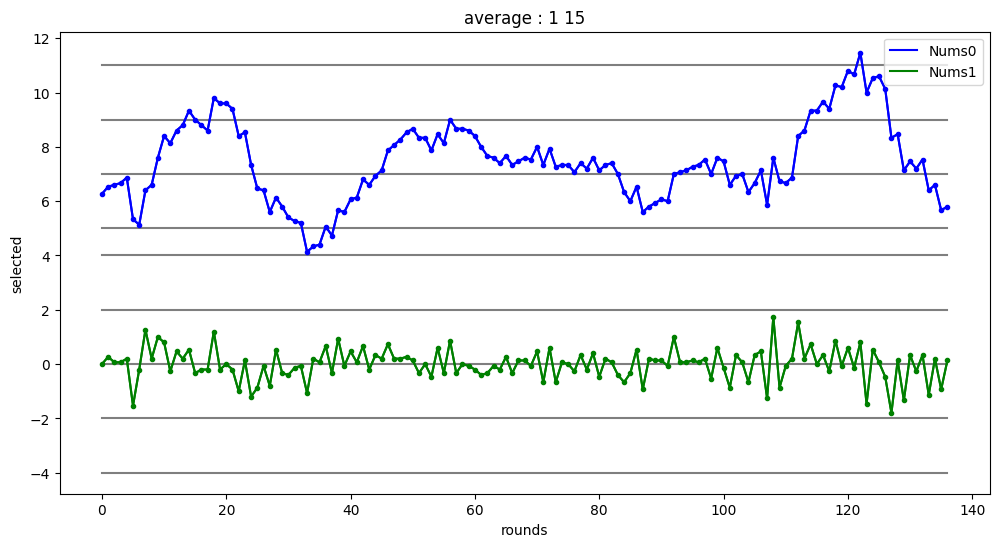

In [150]:
selected = 0
ext_data = 8
wanted_data_length = 20
helper_line_nums_1 = [3, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -2, 0, 2, 4, 5, 7, 9, 11]
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True
               )
candidate[selected] = ext_data

show_col 1


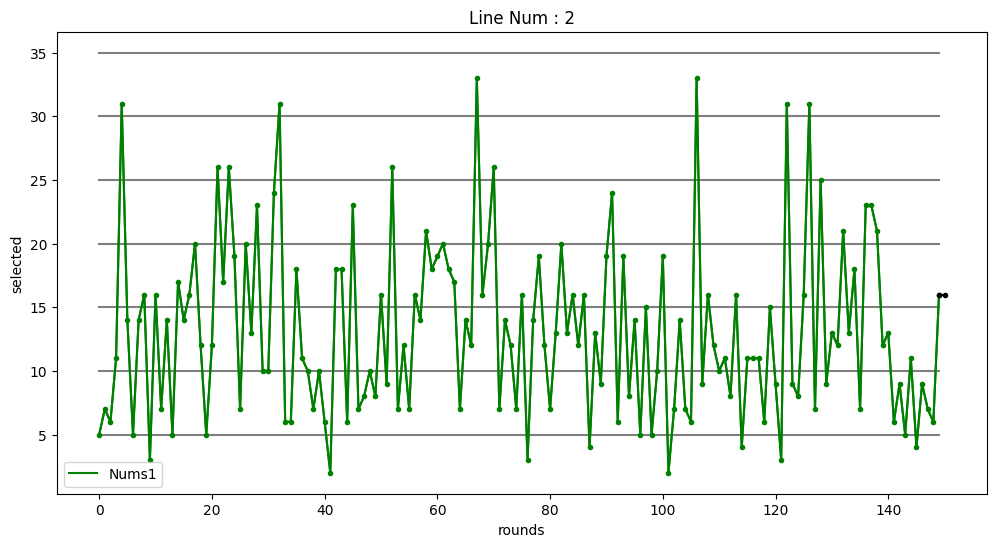

('최소 값           ', '[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]')
('최대 값           ', '[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]')
('사용자 선택       ', '16')
('마지막 값         ', '3')
('마지막 값들       ', '[13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16]')
('자주 나오는 값    ', '[(4, 3), (17, 3), (21, 3), (23, 4), (26, 4), (31, 4), (8, 5), (20, 5), (18, 6), (19, 6), (5, 7), (10, 7), (11, 7), (13, 7), (9, 8), (6, 10), (12, 10), (14, 10), (16, 14), (7, 16)]')
('마지막 수의 앞과 뒤', '[[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [21, 3, 7], [5, 3, 3], [3, 3, 7], [8, 3, 7], [7, 3, 5], [5, 3, -1]]')
________________________________________
('최소값', '[7.0, 7.0, 7.2, 7.2, 7.4]')
('마지막', '[7.6, 7.2, 7.4, 8.4, 10.8]')
show_col 0


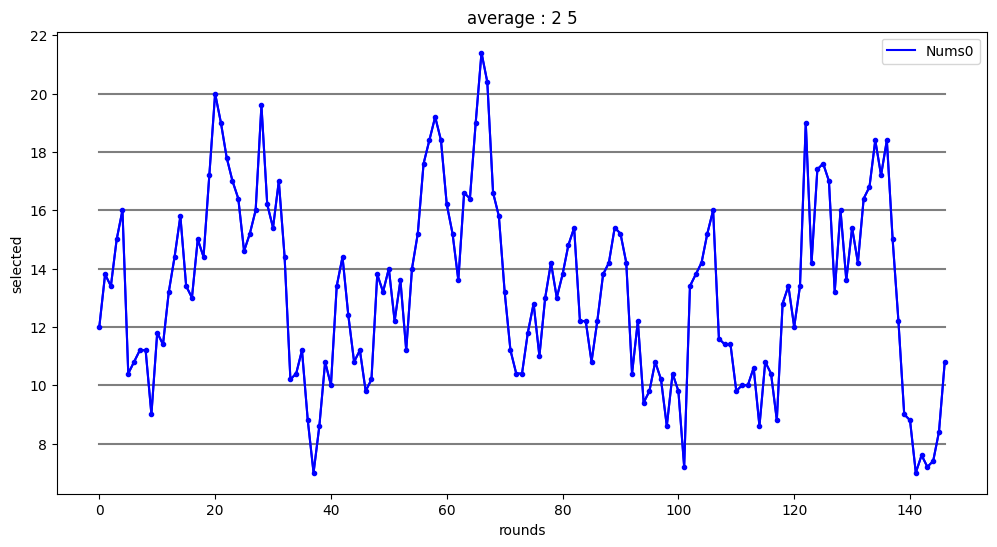

________________________________________
('최소값', '[7.125, 8.0, 8.375, 8.625, 8.75]')
('마지막', '[8.625, 8.0, 7.125, 8.375, 9.25]')
show_col 0


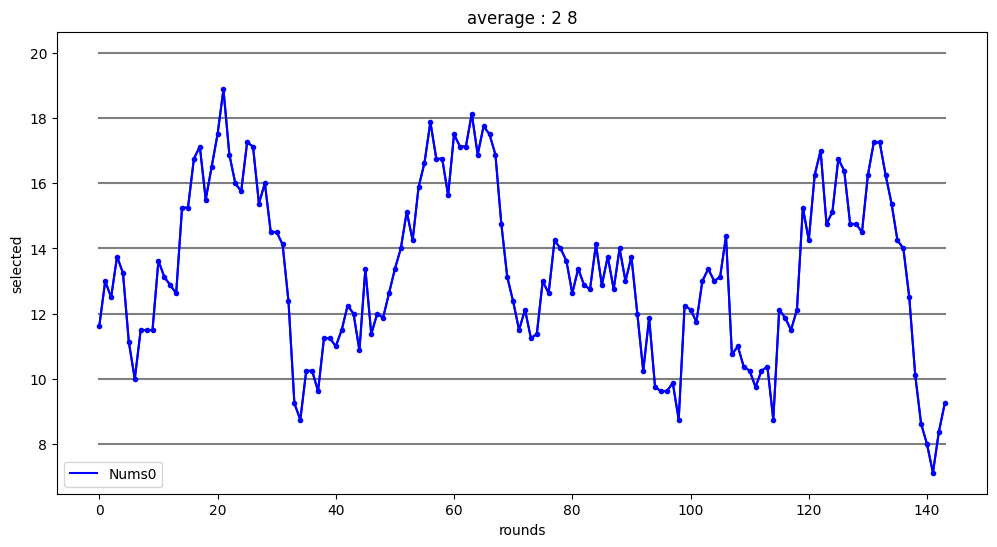

________________________________________
('최소값', '[8.2, 8.6, 8.9, 9.0, 9.4]')
('마지막', '[11.3, 9.7, 8.2, 8.6, 8.9]')
show_col 0


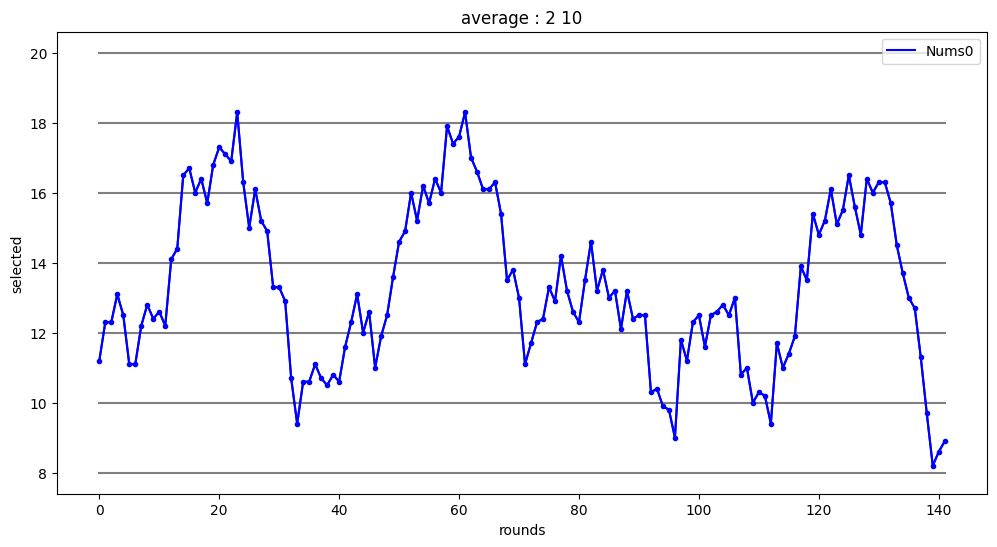

________________________________________
('최소값', '[9.76923076923077, 10.076923076923077, 10.076923076923077, 10.23076923076923, 10.384615384615385]')
('마지막', '[12.384615384615385, 11.538461538461538, 11.461538461538462, 10.923076923076923, 10.384615384615385]')
show_col 0


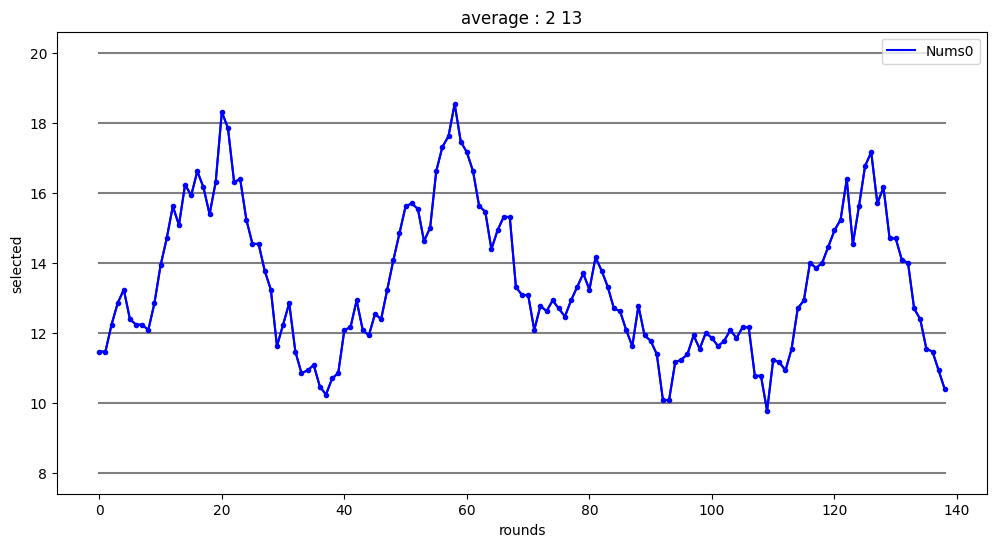

________________________________________
('최소값', '[10.133333333333333, 10.4, 10.533333333333333, 10.666666666666666, 10.666666666666666]')
('마지막', '[13.0, 12.066666666666666, 11.6, 11.466666666666667, 12.066666666666666]')
show_col 0


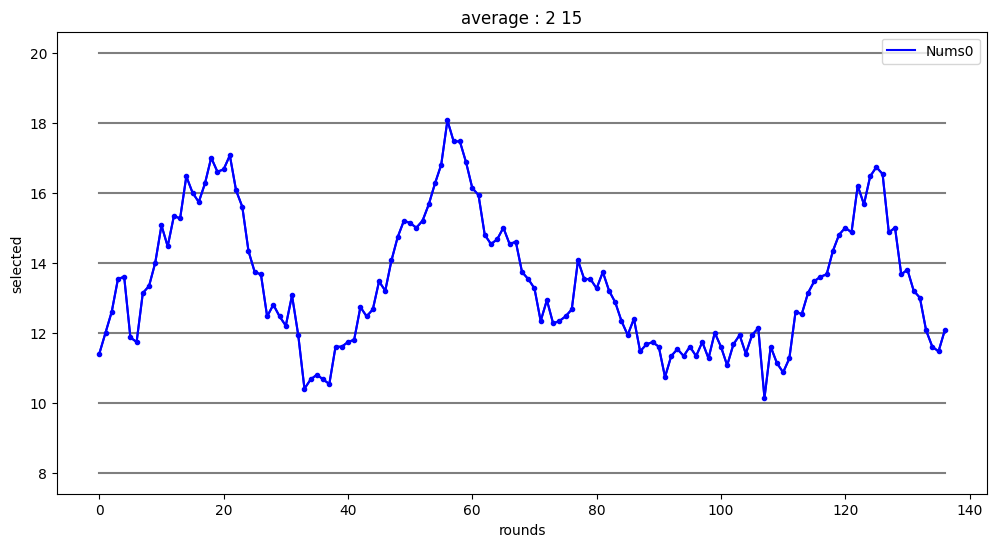

In [138]:
selected = 1
ext_data = 16
wanted_data_length = 20
helper_line_nums_1 = [5, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [8, 10, 12, 14, 16, 18, 20]
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True
               )
candidate[selected] = ext_data

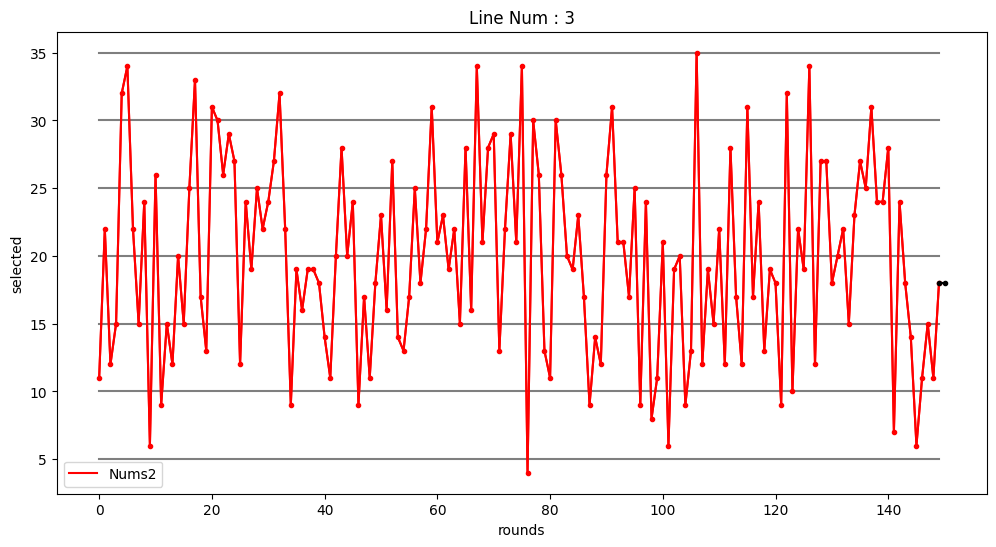

최소 값           : [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
최대 값           : [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
사용자 선택        : 18
마지막 값         : 3
마지막 값들        : [18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18]
자주 나오는 값     : [(14, 4), (23, 4), (34, 4), (25, 5), (26, 5), (28, 5), (31, 5), (13, 6), (20, 6), (21, 6), (27, 6), (9, 7), (11, 7), (17, 7), (12, 8), (15, 8), (18, 8), (24, 9), (19, 10), (22, 10)]
마지막 수의 앞과 뒤 : [[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [21, 3, 7], [5, 3, 3], [3, 3, 7], [8, 3, 7], [7, 3, 5], [5, 3, -1]]
최소값 : [13.25, 13.375, 13.875, 14.625, 14.75]
마지막 : [16.5, 15.375, 13.25, 14.625, 13.875]


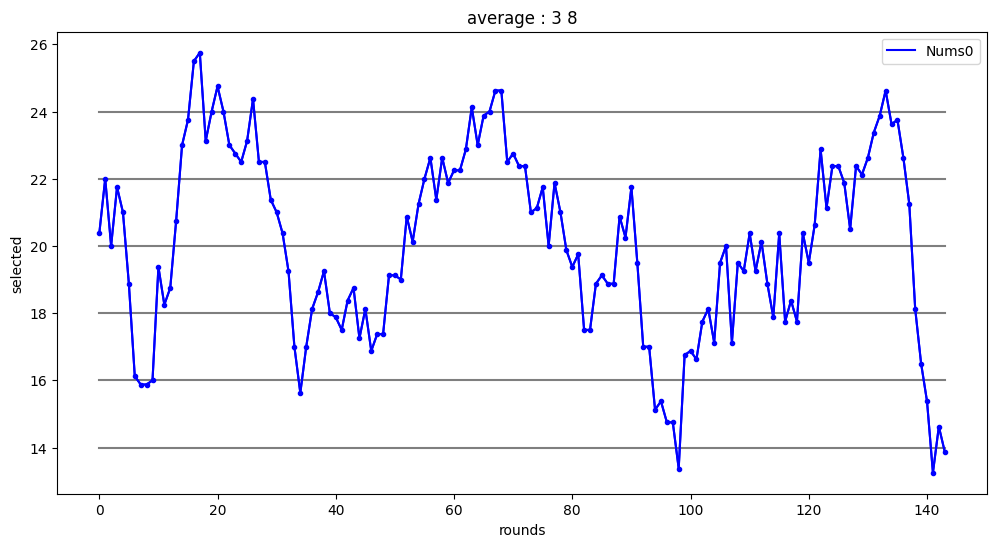

최소값 : [14.0, 14.2, 15.2, 15.2, 15.4]
마지막 : [18.7, 17.1, 15.8, 15.2, 14.2]


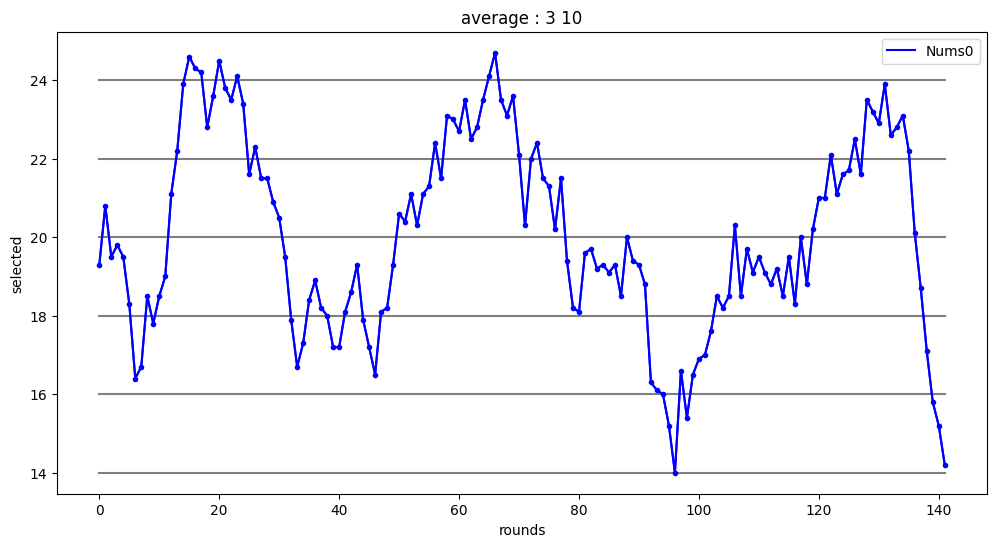

최소값 : [15.615384615384615, 15.846153846153847, 16.153846153846153, 16.23076923076923, 16.307692307692307]
마지막 : [20.153846153846153, 19.53846153846154, 18.307692307692307, 17.76923076923077, 16.76923076923077]


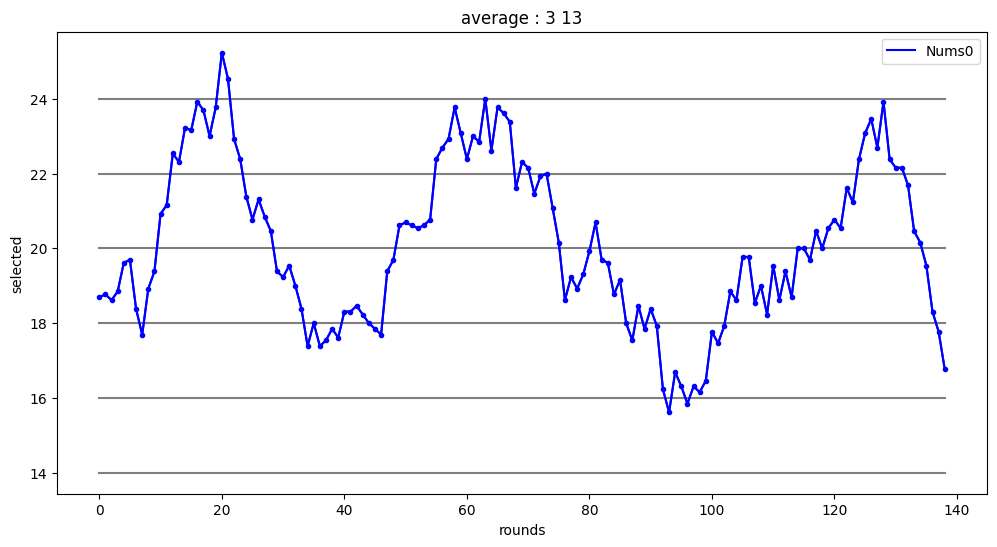

In [49]:
selected = 2
ext_data = 18
wanted_data_length = 20
helper_line_nums_1 = [5, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [14, 16, 18, 20, 22, 24]
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True
               )
candidate[selected] = ext_data

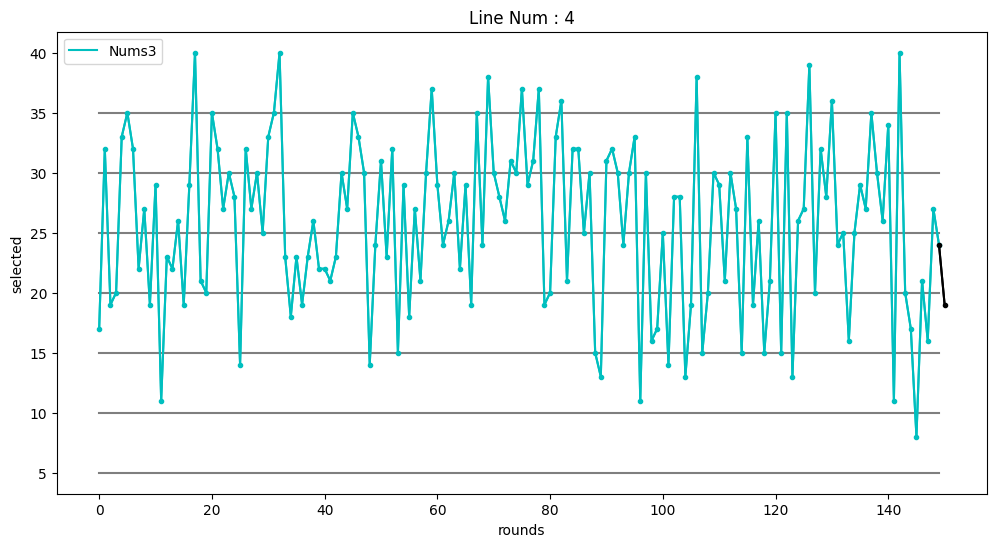

최소 값           : [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
최대 값           : [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택        : 19
마지막 값         : 3
마지막 값들        : [36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24]
자주 나오는 값     : [(17, 3), (37, 3), (40, 3), (31, 4), (22, 5), (25, 5), (28, 5), (15, 6), (20, 6), (23, 6), (24, 6), (33, 6), (21, 7), (26, 7), (29, 8), (35, 8), (19, 9), (27, 9), (32, 9), (30, 15)]
마지막 수의 앞과 뒤 : [[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [21, 3, 7], [5, 3, 3], [3, 3, 7], [8, 3, 7], [7, 3, 5], [5, 3, -1]]
최소값 : [19.0, 20.0, 20.0, 20.875, 21.125]
마지막 : [22.125, 20.875, 20.0, 21.625, 19.0]


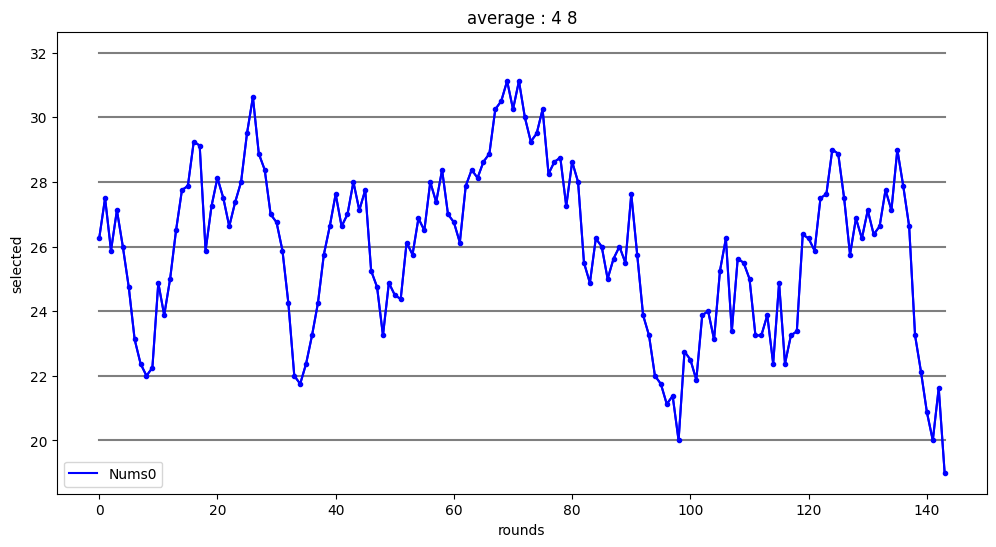

최소값 : [20.1, 20.3, 21.3, 21.5, 21.7]
마지막 : [24.2, 22.3, 22.0, 21.8, 20.3]


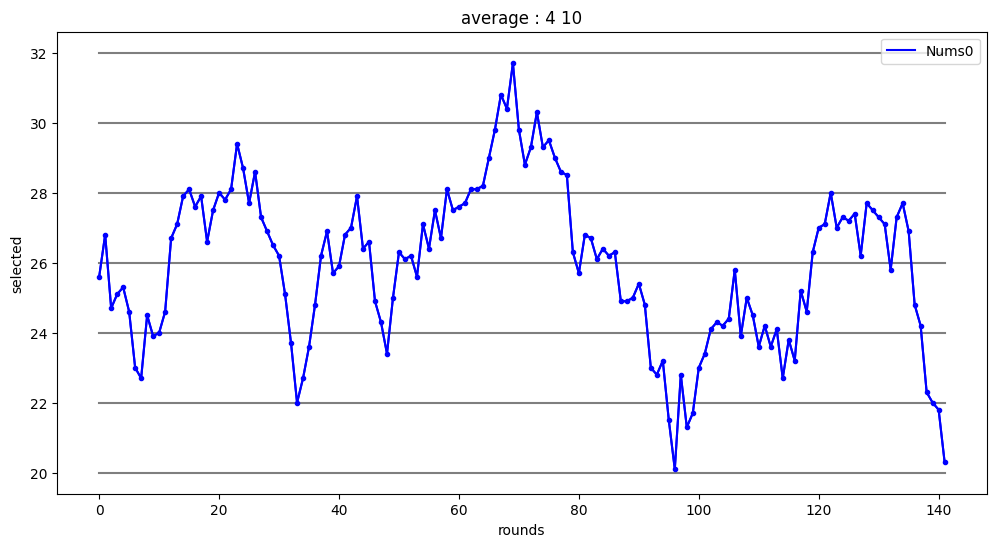

최소값 : [21.076923076923077, 22.076923076923077, 22.153846153846153, 22.46153846153846, 22.53846153846154]
마지막 : [24.846153846153847, 24.153846153846153, 24.0, 23.76923076923077, 22.53846153846154]


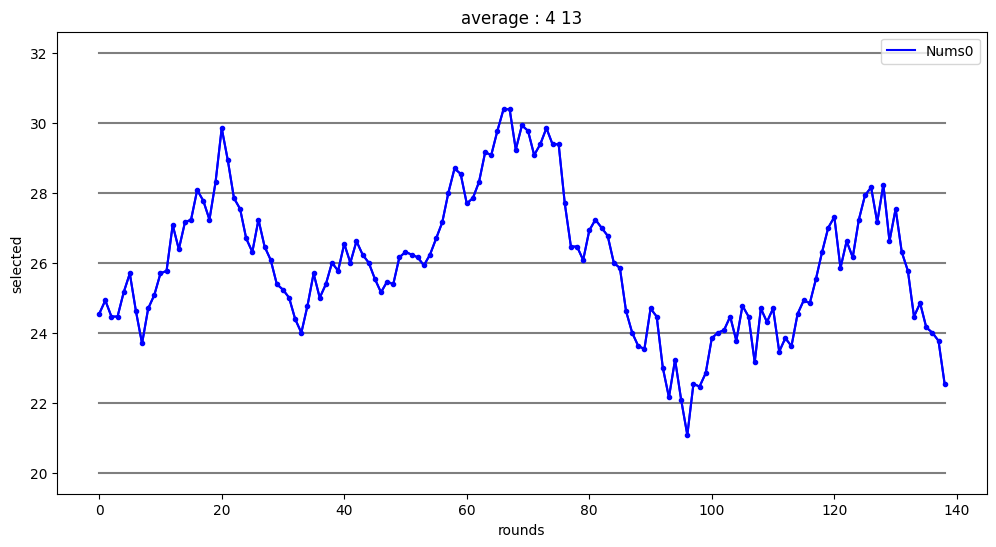

In [51]:
selected = 3
ext_data = 19
wanted_data_length = 20
helper_line_nums_1 = [5, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [20, 22, 24, 26, 28, 30, 32]
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True
               )
candidate[selected] = ext_data

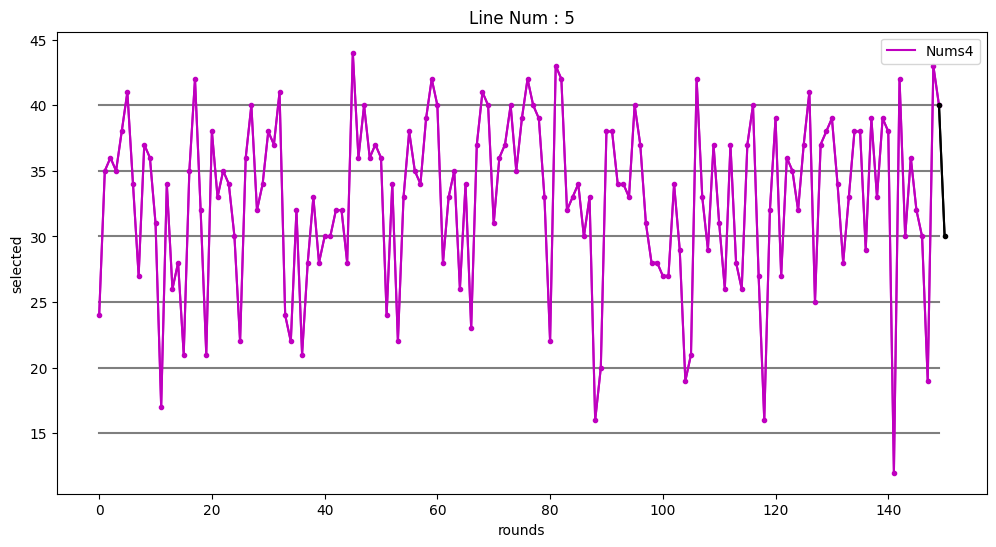

최소 값           : [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
최대 값           : [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
사용자 선택        : 30
마지막 값         : 3
마지막 값들        : [39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40]
자주 나오는 값     : [(24, 3), (29, 3), (21, 4), (22, 4), (26, 4), (31, 4), (41, 4), (27, 5), (42, 6), (30, 7), (39, 7), (35, 8), (28, 9), (32, 9), (36, 9), (40, 9), (38, 10), (33, 11), (37, 11), (34, 12)]
마지막 수의 앞과 뒤 : [[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [21, 3, 7], [5, 3, 3], [3, 3, 7], [8, 3, 7], [7, 3, 5], [5, 3, -1]]
최소값 : [26.625, 27.25, 27.875, 28.0, 28.375]
마지막 : [32.375, 29.875, 30.5, 34.0, 32.5]


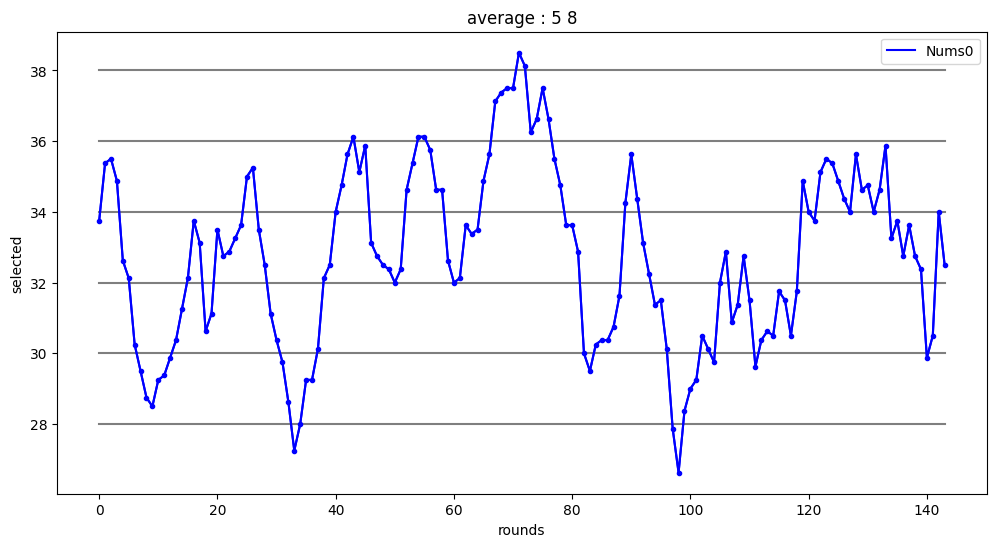

최소값 : [28.0, 28.1, 28.6, 28.7, 28.8]
마지막 : [33.1, 31.1, 32.1, 32.2, 31.4]


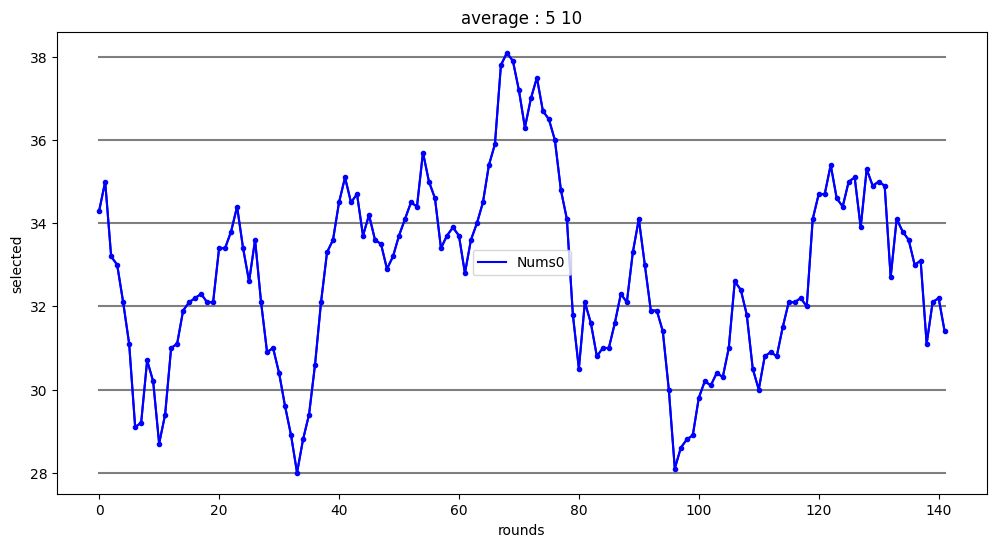

최소값 : [29.307692307692307, 29.46153846153846, 29.53846153846154, 29.615384615384617, 29.615384615384617]
마지막 : [33.53846153846154, 32.07692307692308, 32.46153846153846, 33.30769230769231, 32.61538461538461]


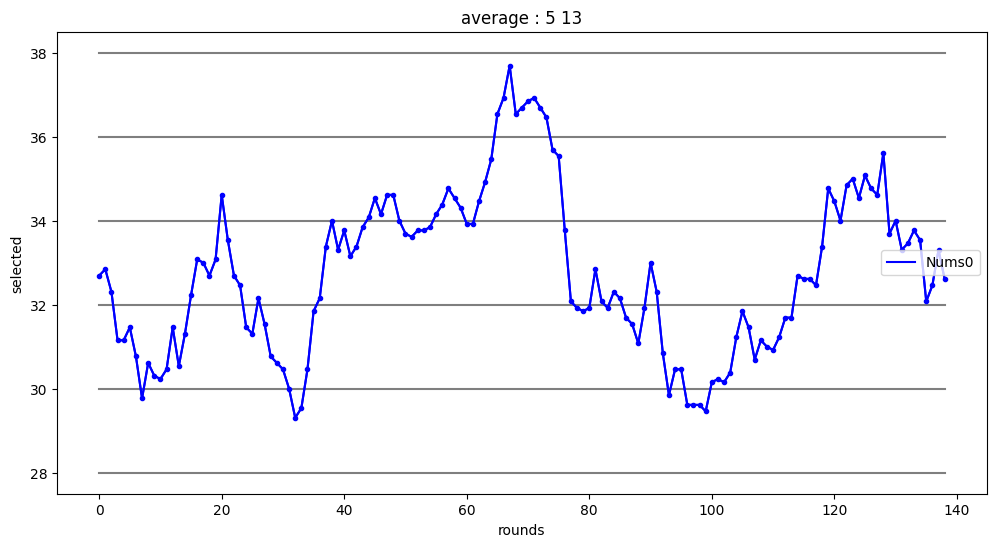

In [57]:
selected = 4
ext_data = 30
wanted_data_length = 20
helper_line_nums_1 = [15, 20, 25, 30, 35, 40]
helper_line_nums_2 = [28, 30, 32, 34, 36, 38]
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True
               )
candidate[selected] = ext_data

show_col 5


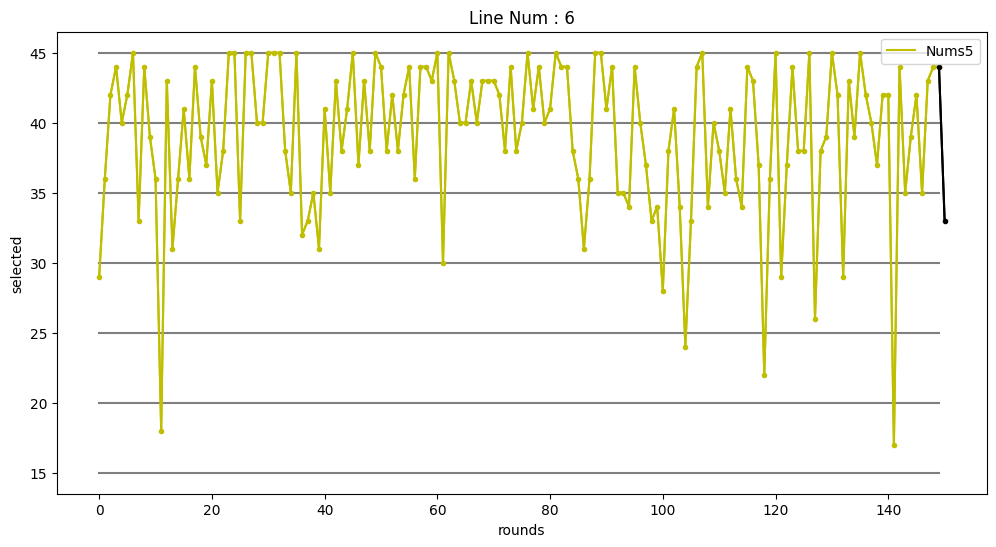

('최소 값           ', '[17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]')
('최대 값           ', '[24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]')
('사용자 선택       ', '33')
('마지막 값         ', '3')
('마지막 값들       ', '[45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44]')
('자주 나오는 값    ', '[(24, 1), (26, 1), (28, 1), (30, 1), (32, 1), (29, 3), (31, 3), (34, 5), (39, 5), (33, 6), (37, 6), (41, 8), (35, 9), (36, 9), (42, 10), (40, 11), (43, 13), (38, 14), (44, 19), (45, 22)]')
('마지막 수의 앞과 뒤', '[[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [21, 3, 7], [5, 3, 3], [3, 3, 7], [8, 3, 7], [7, 3, 5], [5, 3, -1]]')
________________________________________
('최소값', '[32.8, 33.0, 33.4, 33.8, 33.8]')
('마지막', '[39.0, 38.8, 40.6, 41.6, 39.8]')

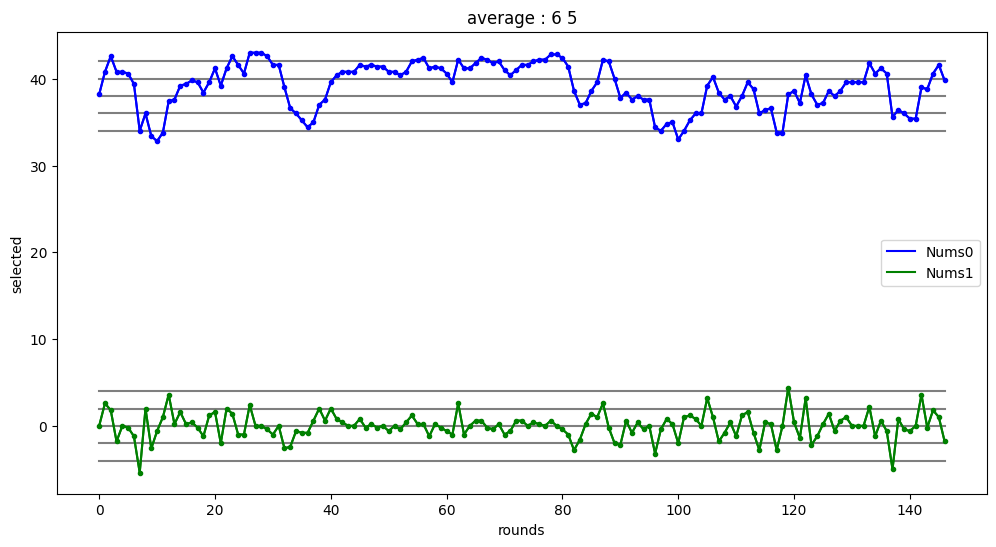

________________________________________
('최소값', '[33.125, 33.625, 34.5, 35.0, 35.0]')
('마지막', '[37.0, 37.125, 37.375, 40.75, 39.375]')
show_col 0
show_col 1


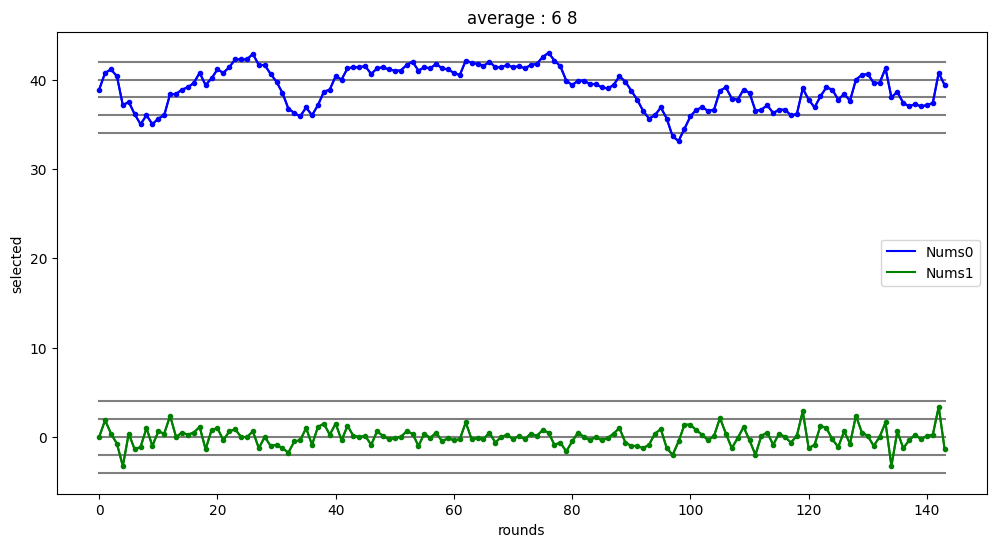

________________________________________
('최소값', '[34.2, 34.6, 35.3, 35.4, 35.5]')
('마지막', '[37.3, 37.6, 38.3, 38.5, 37.6]')
show_col 0
show_col 1


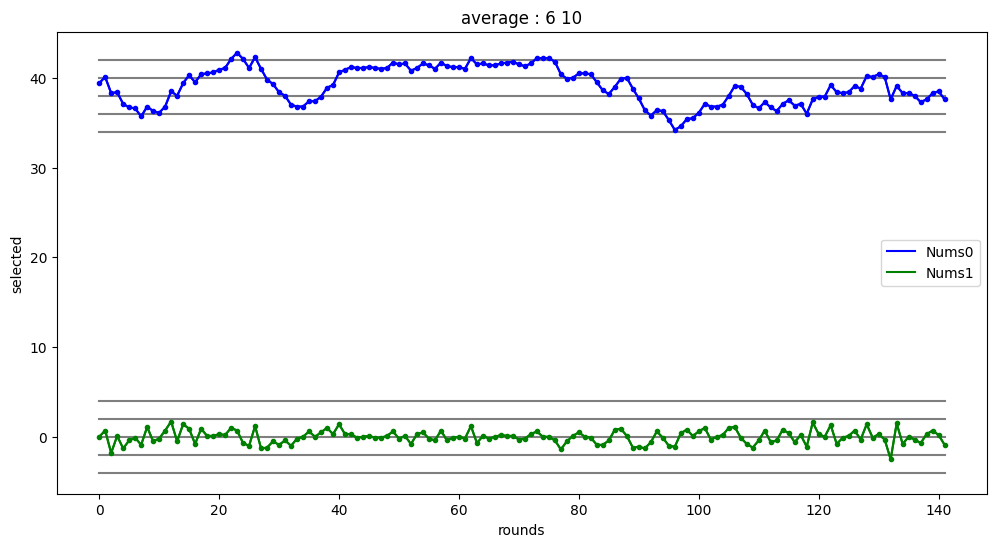

________________________________________
('최소값', '[35.0, 35.15384615384615, 35.69230769230769, 35.76923076923077, 35.76923076923077]')
('마지막', '[38.38461538461539, 38.69230769230769, 38.61538461538461, 38.76923076923077, 38.23076923076923]')
show_col 0
show_col 1


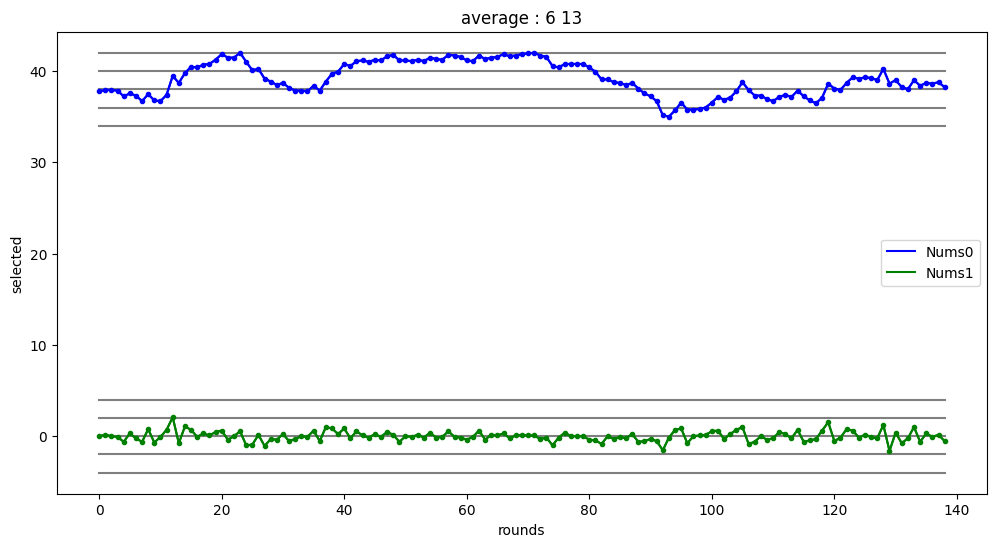

________________________________________
('최소값', '[35.6, 35.6, 35.86666666666667, 36.13333333333333, 36.13333333333333]')
('마지막', '[38.06666666666667, 39.0, 39.06666666666667, 39.4, 38.6]')
show_col 0
show_col 1


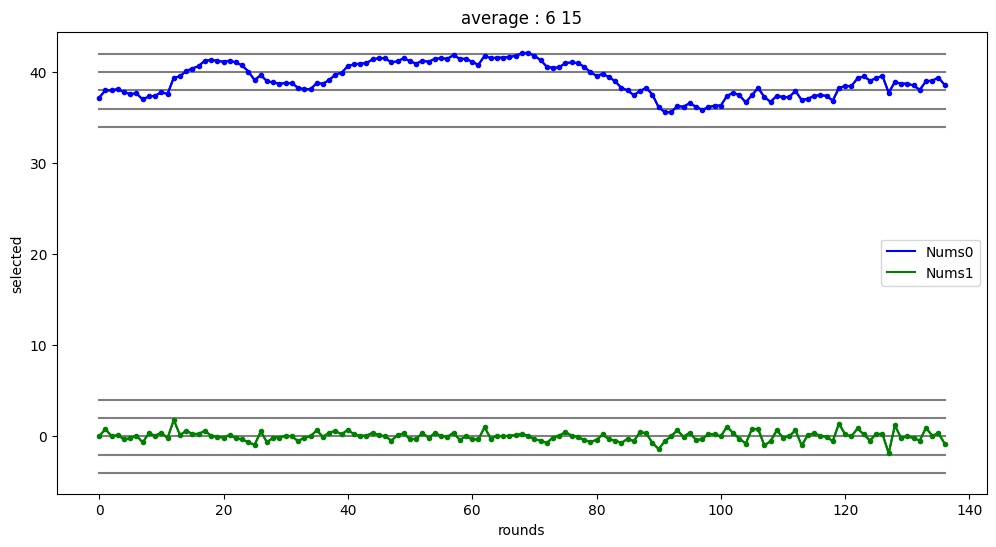

In [141]:
selected = 5
ext_data = 33
wanted_data_length = 20
helper_line_nums_1 = [15, 20, 25, 30, 35, 40, 45]
helper_line_nums_2 = [-4, -2, 0, 2, 4, 34, 36, 38, 40, 42]
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True
               )
candidate[selected] = ext_data

In [73]:
print(candidate)

{0: 8, 1: 16, 2: 18, 3: 19, 4: 30, 5: 33}


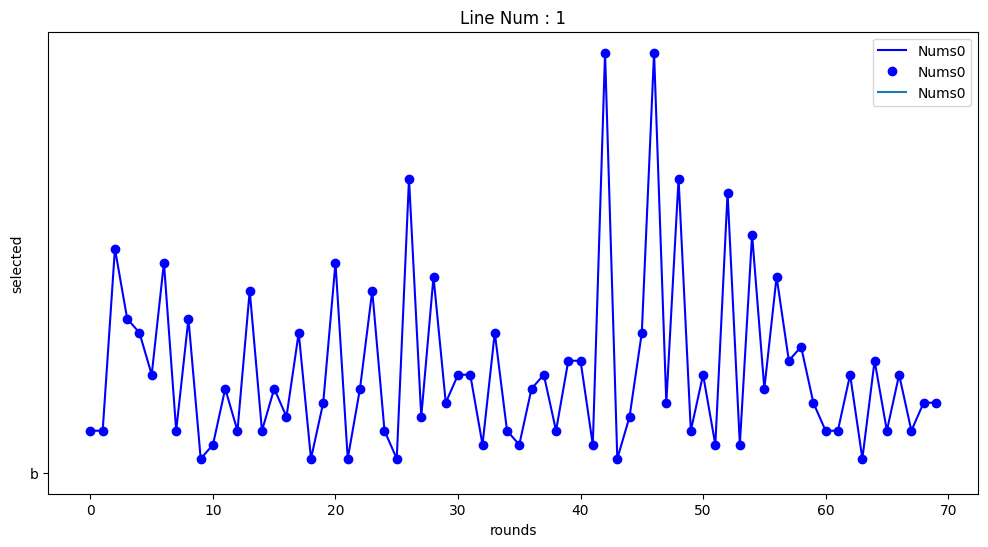

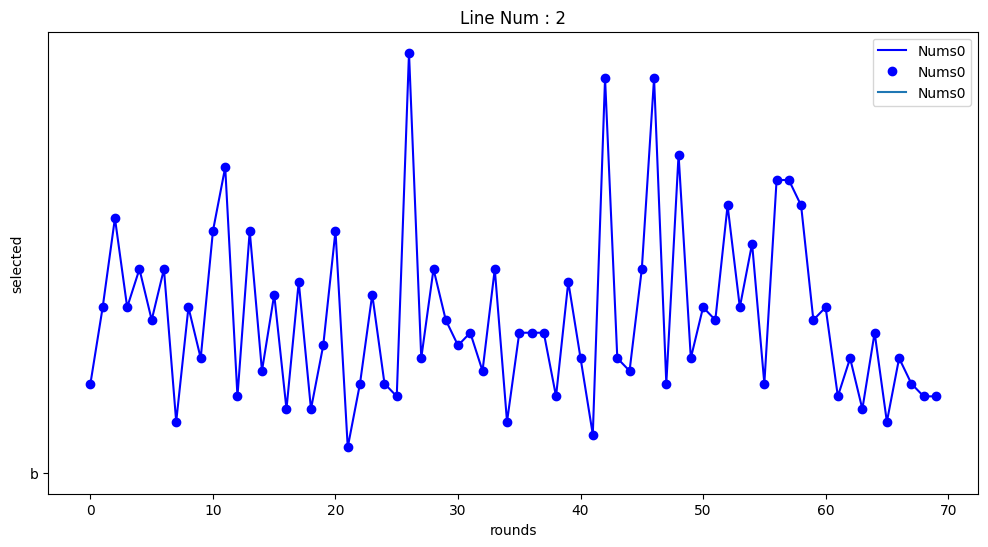

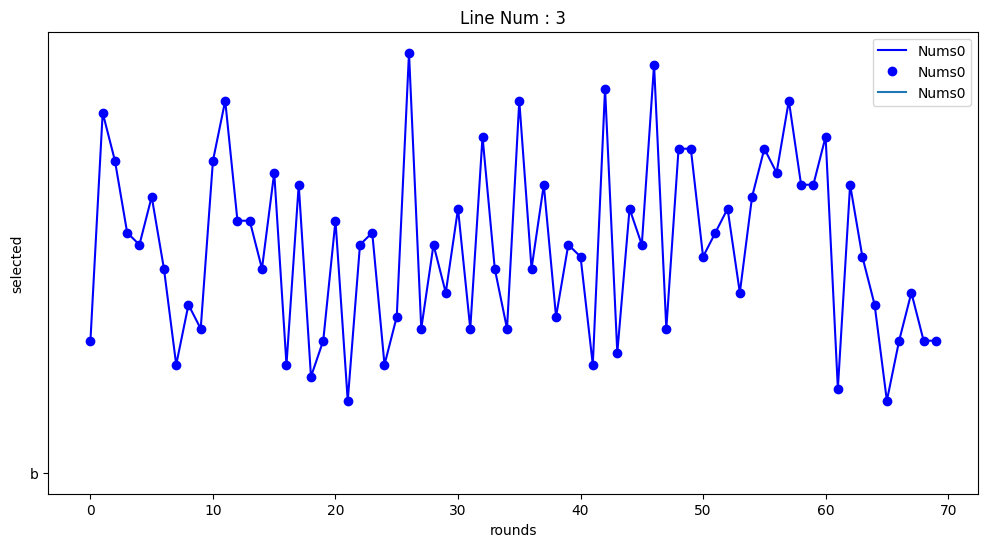

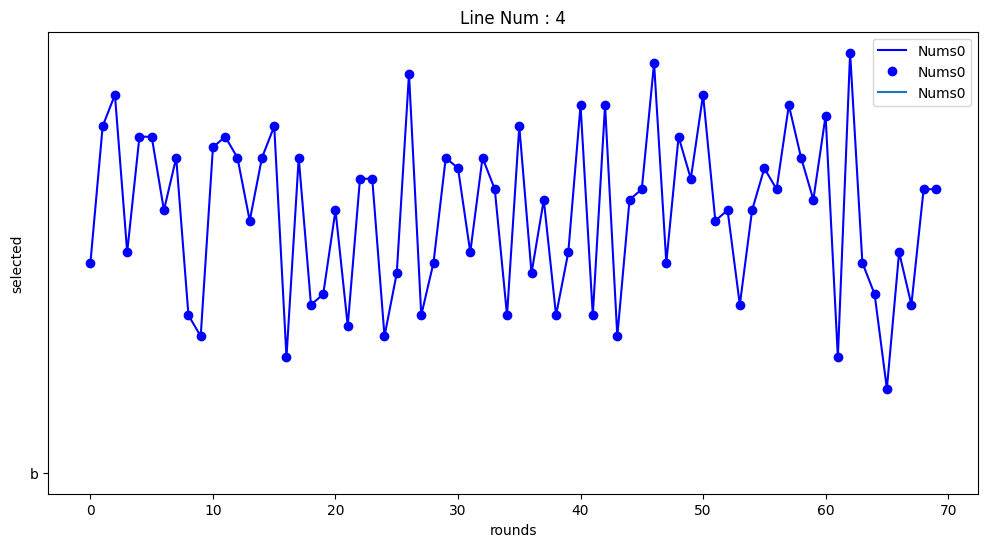

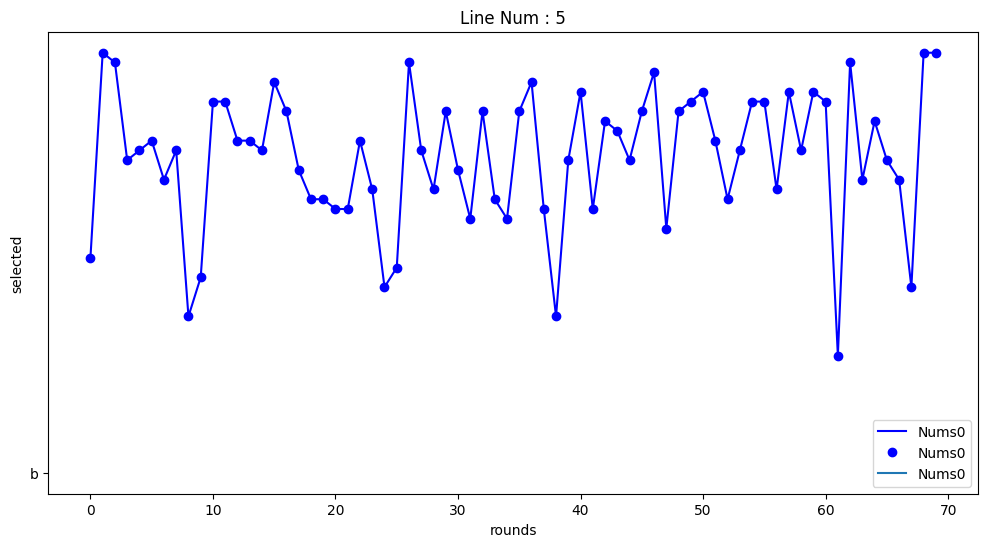

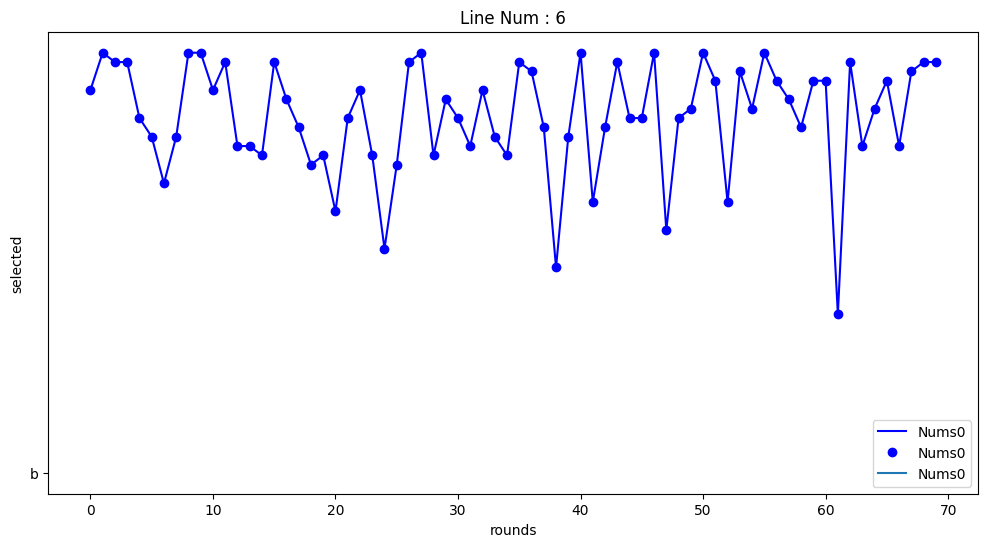

In [115]:
for i in range(6):
    draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')

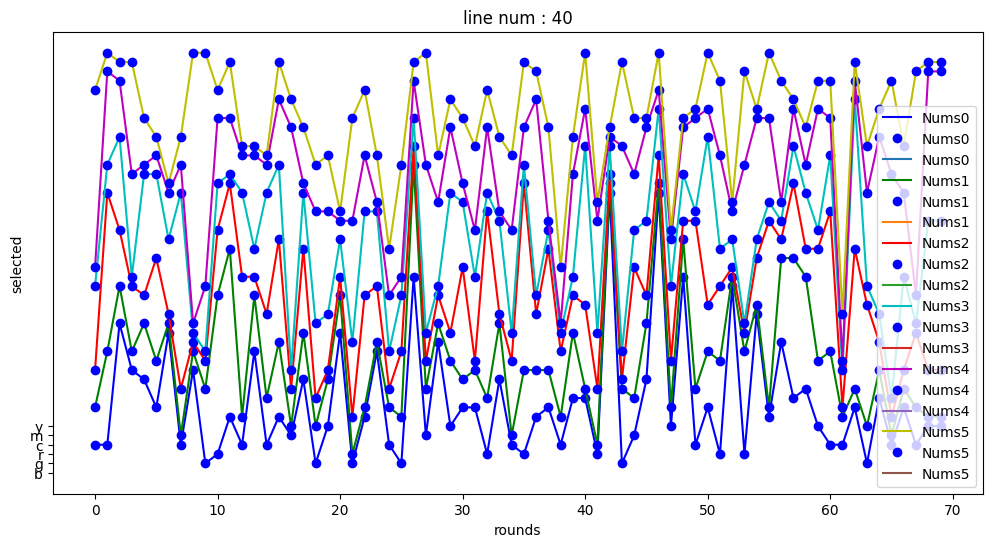

In [116]:
# for i in range(6):
#     draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')
row_list = []
for nums in nums_by_row:
    row_list.append(nums)
draw_scatter(row_list, f'line num : {key}', True, True, [0,1,2,3,4,5])

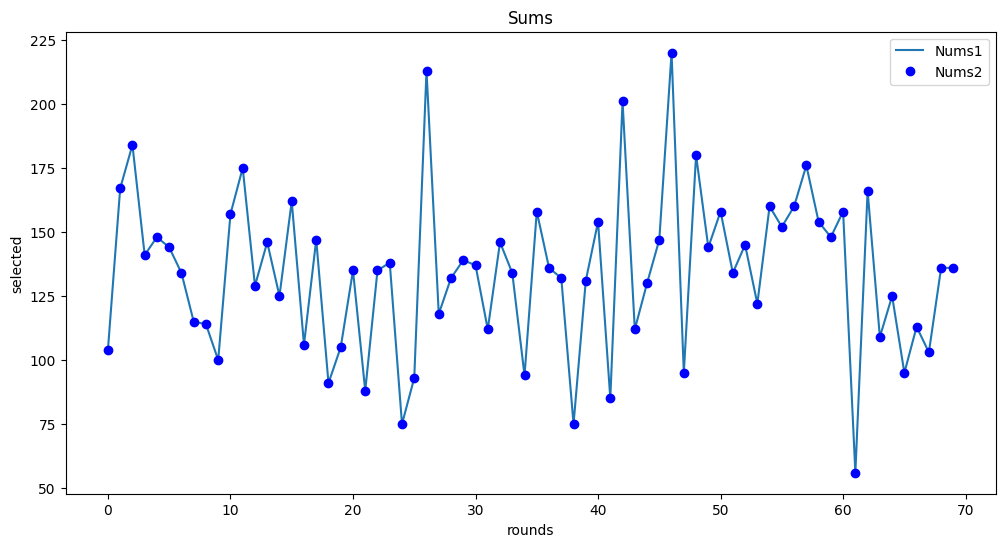

In [55]:
draw_scatter([sums], f'Sums')

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


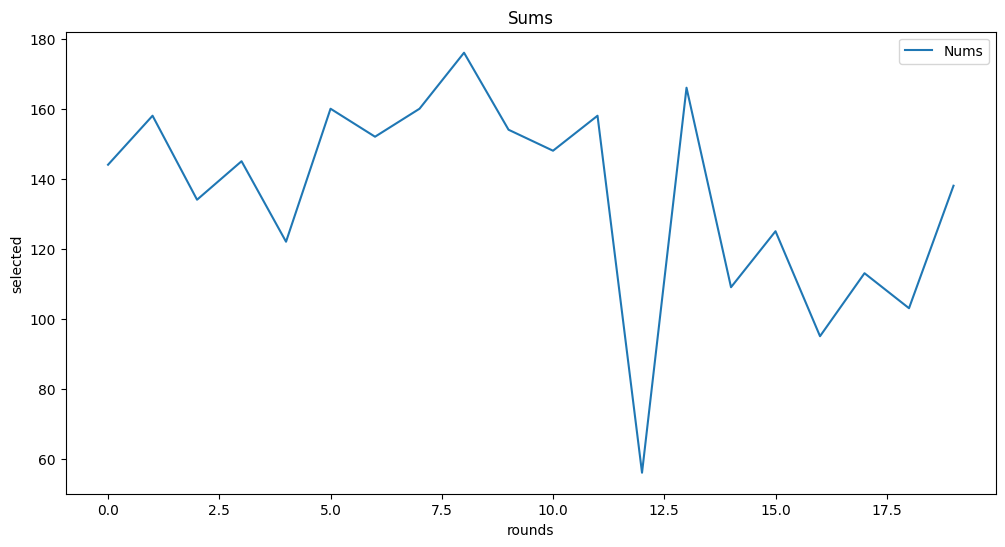

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))